In [1]:
import sys
import skimage
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import dask
import dask.array as da
import numpy as np
from dask.dot import dot_graph
from dask.distributed import Client, LocalCluster, progress
from dask.distributed import Scheduler
from skimage.filters import threshold_otsu
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage import data

In [2]:
counter = 0
client = Client()
print client

distributed.deploy.local - INFO - To start diagnostics web server please install Bokeh


<Client: scheduler='tcp://127.0.0.1:8786' processes=4 cores=4>


In [3]:
def blob_detection(image):
	blobs_dog = blob_dog(image, max_sigma=30, threshold=.1)
	return blobs_dog

In [4]:
def show_blob(image,b):
	# counter = 0
	blobs =  [b]
	colors = ['red']
	titles = ['Difference of Gaussian']
	sequence = zip(blobs, colors, titles)
	for blobs, color, title in sequence:
		fig,ax = plt.subplots(1, 1)
    	ax.set_title(title)
    	ax.imshow(image, interpolation='nearest')
    	for blob in blobs:
        	y, x, r = blob
        	c = plt.Circle((x, y), r, color=color, linewidth=1, fill=False)
        	ax.add_patch(c)
	plt.show()
	global counter
	fig.savefig('/Users/nivethamahalakshmibalasamy/Documents/ECI-PolarScience/nivetha/out/blob_%d.jpeg' %(counter))
	counter = counter+1

In [5]:
# Read images using delayed function into an image array
def array_images():
	custom_imread = (skimage.io.imread)
	images = [custom_imread('/Users/nivethamahalakshmibalasamy/Documents/ECI-PolarScience/dask_stuff/seal/seal%d.jpeg' %i) for i in range(1,5)]
	L1 = client.map(blob_detection, images)
	# L1 = client.map(blob_detection, L)
	print L1
	print "going to client.gather function"
	results = client.gather(L1)
	# print results.dtype
	progress(results)
	print "gathered results"

	for i, r in zip(images, results):
		show_blob(i,r)

[<Future: status: pending, key: blob_detection-ea91349f18a0716c482f43f9092cdd98>, <Future: status: pending, key: blob_detection-31d1f48b8c41cf77c49cc1e52e77ca26>, <Future: status: pending, key: blob_detection-6d835775f2755107c708e87dba3f3fc5>, <Future: status: pending, key: blob_detection-6d835775f2755107c708e87dba3f3fc5>]
going to client.gather function
gathered results


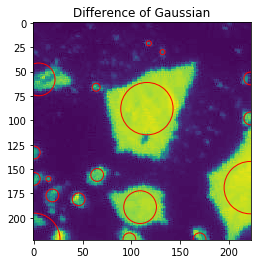

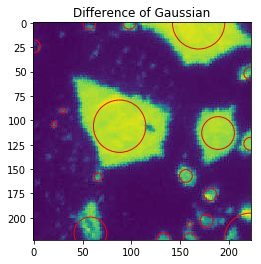

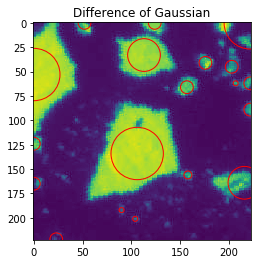

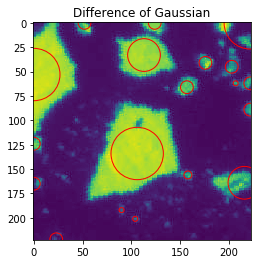

In [6]:
if __name__ == '__main__':
	array_images()
